# Text-Mining Assignment :1) Extract reviews of any product from ecommerce website like amazon   2) Perform emotion mining



***To extract amzon reviews I used Chrome extension 'Amazon Reviews Exporter' and downloaded csv.
Here I am doing emotion mining for product 'The Derma Co C-Cinamide Radiance Vitamin C Serum With 10% Vitamin C & 5% Niacinamide for Glowing & Spotless Skin - 30ml'
Review link is https://www.amazon.in/Derma-Co-C-Cinamide-Radiance-Niacinamide/product-reviews/B0BRXQRFGB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews***

***Importing libraries***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import matplotlib.pyplot as plt
import seaborn as sns

***Loading DataSet***

In [2]:
amazon_review_df = pd.read_csv('amazon_reviews.csv',index_col='id')
amazon_review_df

,profileName,text,date,title,rating,images,helpful
id,,,,,,,
RBTVLZJUXM9TB,Tarannum,It helps with dullness and in fading dark spots,Reviewed in India on 31 July 2023,One of the best vitamin c serum that I have us...,4,NaN,0
R2X818ZWQE5CO6,Manju k.,Suitable for sensitive skin .,Reviewed in India on 24 July 2023,Super,4,NaN,0
R3LEKHFN2S7X12,Saima Shafi,"Have been using it for the past five days , ye...",Reviewed in India on 15 June 2023,Combination of Vitamin C and niacinamide,4,NaN,2
R3CHIL2EGCNIE1,Harpreet kaur,I have oily skin and also blemishes. I heard a...,Reviewed in India on 13 March 2023,Best serum,4,https://m.media-amazon.com/images/I/71c0ObzI2z...,3
RWRJ52N2JQVF2,Abhirami G,Did not find any change. Bottle is not handy. ...,Reviewed in India on 7 June 2023,06-Oct,3,NaN,1
R1RNXFN2U02TQW,Kavita Jain,"Vitamin c &Niacinamide combined, this serum wo...",Reviewed in India on 21 March 2023,A fantastic serum for radiant skin,4,https://m.media-amazon.com/images/I/31vgp3F+WD...,2
R1SG364J5UTPMV,sazan s.,"liked the serum, one pump n its enough for the...",Reviewed in India on 30 March 2023,1 pump action,4,NaN,4
RQCWWCEQN6H4S,Ruchi Tayal,I'm Looking for improvement in skin radiance &...,Reviewed in India on 26 March 2023,Best serum i ever used!,5,NaN,1
REY6CU9CHNEVO,Glory,Worth buying,Reviewed in India on 19 June 2023,Best product,5,NaN,1


In [3]:
amazon_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, RBTVLZJUXM9TB to R2N0S132YITUDA
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   profileName  50 non-null     object
 1   text         50 non-null     object
 2   date         50 non-null     object
 3   title        50 non-null     object
 4   rating       50 non-null     int64 
 5   images       18 non-null     object
 6   helpful      50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 3.1+ KB


In [4]:
amazon_review_df.drop(['profileName','date','title','rating','images','helpful'],axis=1,inplace=True)
amazon_review_df

,text
id,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots
R2X818ZWQE5CO6,Suitable for sensitive skin .
R3LEKHFN2S7X12,"Have been using it for the past five days , ye..."
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo..."
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the..."
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...
REY6CU9CHNEVO,Worth buying


In [5]:
amazon_review_df

,text
id,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots
R2X818ZWQE5CO6,Suitable for sensitive skin .
R3LEKHFN2S7X12,"Have been using it for the past five days , ye..."
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo..."
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the..."
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...
REY6CU9CHNEVO,Worth buying


In [6]:
amazon_review_df.head(10)

,text
id,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots
R2X818ZWQE5CO6,Suitable for sensitive skin .
R3LEKHFN2S7X12,"Have been using it for the past five days , ye..."
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo..."
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the..."
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...
REY6CU9CHNEVO,Worth buying


# EDA of Amazon Reviews

In [7]:
amazon_review_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, RBTVLZJUXM9TB to R2N0S132YITUDA
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


In [8]:
amazon_review_df.isna().sum()

text    0
dtype: int64

# EDA

***Number of Words***

In [9]:
amazon_review_df['word_count'] = amazon_review_df['text'].apply(lambda x: len(str(x).split(" ")))
amazon_review_df[['text','word_count']].head(10)

,text,word_count
id,,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots,9
R2X818ZWQE5CO6,Suitable for sensitive skin .,5
R3LEKHFN2S7X12,"Have been using it for the past five days , ye...",15
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...,67
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...,23
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo...",42
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the...",27
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...,81
REY6CU9CHNEVO,Worth buying,2


***Number of characters***

In [10]:
amazon_review_df['char_count'] = amazon_review_df['text'].str.len() ## this also includes spaces
amazon_review_df.head(10)

,text,word_count,char_count
id,,,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots,9,47
R2X818ZWQE5CO6,Suitable for sensitive skin .,5,29
R3LEKHFN2S7X12,"Have been using it for the past five days , ye...",15,67
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...,67,329
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...,23,115
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo...",42,257
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the...",27,149
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...,81,440
REY6CU9CHNEVO,Worth buying,2,12


***Number of stop words***

In [11]:
from nltk.corpus import stopwords

stop_df  = pd.read_csv('stop.csv')
stop = np.array(stop_df['stop_words'])
stop

array(['a', "a's", 'able', 'about', 'above', 'according', 'accordingly',
       'across', 'actually', 'after', 'afterwards', 'again', 'against',
       "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along',
       'already', 'also', 'although', 'always', 'am', 'among', 'amongst',
       'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
       'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear',
       'appreciate', 'appropriate', 'are', "aren't", 'around', 'as',
       'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away',
       'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes',
       'becoming', 'been', 'before', 'beforehand', 'behind', 'being',
       'believe', 'below', 'beside', 'besides', 'best', 'better',
       'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon",
       "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes',
       'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come',


In [12]:
amazon_review_df['stopwords'] = amazon_review_df['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
amazon_review_df[['text','stopwords']].head(10)

,text,stopwords
id,,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots,3
R2X818ZWQE5CO6,Suitable for sensitive skin .,1
R3LEKHFN2S7X12,"Have been using it for the past five days , ye...",10
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...,32
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...,10
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo...",16
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the...",15
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...,47
REY6CU9CHNEVO,Worth buying,0


***Number of Positive words***

In [13]:
positive_df  = pd.read_csv('positive-words.csv',header=None)
positive_df

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant
...,...
2001,youthful
2002,zeal
2003,zenith
2004,zest


In [14]:
positive = np.array(positive_df[0])
positive

array(['a+', 'abound', 'abounds', ..., 'zenith', 'zest', 'zippy'],
      dtype=object)

In [15]:
amazon_review_df['postive_words'] = amazon_review_df['text'].apply(lambda x: len([x for x in x.split() if x in positive]))
amazon_review_df[['text','postive_words']].head(10)

,text,postive_words
id,,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots,0
R2X818ZWQE5CO6,Suitable for sensitive skin .,1
R3LEKHFN2S7X12,"Have been using it for the past five days , ye...",0
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...,5
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...,0
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo...",7
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the...",2
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...,9
REY6CU9CHNEVO,Worth buying,0


In [16]:
amazon_review_df[['text','postive_words']].tail(10)

,text,postive_words
id,,
R3N89IYCSWQO8C,koi bhi fayda nhi hua mujhe 1 month se use krr...,0
R3TCALLNYGPAOT,It is a waste product .it increases acne on my...,0
R3UTTG4SOYSMXH,honest review... my skin darkened and started ...,1
R1PKBF6KEJLKWA,"I m using this since last 3 months, didn't fin...",1
R23WZSURRTZ491,Have been using this serum for few days and I ...,2
R22AIS1KKY2XB5,It have water like consistency and really effe...,4
R26R4GDCICPNM4,My skin is oily and had become dull.One of my ...,4
R1ZER492VBD1L5,After lot of search i got this wonderful serum...,2
REXJWVY2YZHUE,This is a really good serum. Its makes skin br...,3


***Number of Negative words***

In [17]:
negative_df  = pd.read_csv('negative-words.csv', encoding='ISO-8859–1',header=None)
negative_df

,0
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable
...,...
4778,zaps
4779,zealot
4780,zealous
4781,zealously


In [18]:
negative = np.array(negative_df[0])
negative

array(['2-faced', '2-faces', 'abnormal', ..., 'zealous', 'zealously',
       'zombie'], dtype=object)

In [19]:
amazon_review_df['negative_words'] = amazon_review_df['text'].apply(lambda x: len([x for x in x.split() if x in negative]))
amazon_review_df[['text','negative_words']].head(10)

,text,negative_words
id,,
RBTVLZJUXM9TB,It helps with dullness and in fading dark spots,1
R2X818ZWQE5CO6,Suitable for sensitive skin .,0
R3LEKHFN2S7X12,"Have been using it for the past five days , ye...",0
R3CHIL2EGCNIE1,I have oily skin and also blemishes. I heard a...,0
RWRJ52N2JQVF2,Did not find any change. Bottle is not handy. ...,1
R1RNXFN2U02TQW,"Vitamin c &Niacinamide combined, this serum wo...",1
R1SG364J5UTPMV,"liked the serum, one pump n its enough for the...",1
RQCWWCEQN6H4S,I'm Looking for improvement in skin radiance &...,1
REY6CU9CHNEVO,Worth buying,0


In [20]:
amazon_review_df[['text','negative_words']].tail(10)

,text,negative_words
id,,
R3N89IYCSWQO8C,koi bhi fayda nhi hua mujhe 1 month se use krr...,0
R3TCALLNYGPAOT,It is a waste product .it increases acne on my...,1
R3UTTG4SOYSMXH,honest review... my skin darkened and started ...,1
R1PKBF6KEJLKWA,"I m using this since last 3 months, didn't fin...",1
R23WZSURRTZ491,Have been using this serum for few days and I ...,0
R22AIS1KKY2XB5,It have water like consistency and really effe...,0
R26R4GDCICPNM4,My skin is oily and had become dull.One of my ...,1
R1ZER492VBD1L5,After lot of search i got this wonderful serum...,1
REXJWVY2YZHUE,This is a really good serum. Its makes skin br...,0


***Total number of text in the available DataFrame***

In [21]:
# Total text
print('Total text :', len(amazon_review_df.index), '\n')

Total text : 50 



# Text Processing

***
**Collecting all the reviews for Textual Pre-Processing**
***

In [22]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [23]:
amazon_review_df['text'] = amazon_review_df.text.apply(clean)
amazon_review_df.text

id
RBTVLZJUXM9TB       it helps with dullness and in fading dark spots
R2X818ZWQE5CO6                         suitable for sensitive skin 
R3LEKHFN2S7X12    have been using it for the past five days  yet...
R3CHIL2EGCNIE1    i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2     did not find any change bottle is not handy ma...
R1RNXFN2U02TQW    vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV    liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S     im looking for improvement in skin radiance  s...
REY6CU9CHNEVO                                          worth buying
R2B48RA0GWT4DK    okay so after using the serum for like a week ...
R3EINL5T39Q2IH    skin looks so bright after using this i love t...
RMQHFXWBJ149H     after using this serum my skin has change a lo...
ROT8FHFKG9RBF     using it form  months and not effect scars rem...
R3F16CP4FXN4QE    this is really a nice product this is combinat...
R1LLQPKLLU0BKL    acne is my concern and afte

In [24]:
amazon_text=[Text.strip() for Text in amazon_review_df.text] # remove both the leading and the trailing characters
amazon_text=[Text for Text in amazon_text if Text] # removes empty strings, because they are considered in Python as False
amazon_text[0:10]

['it helps with dullness and in fading dark spots',
 'suitable for sensitive skin',
 'have been using it for the past five days  yet to see the results',
 'i have oily skin and also blemishes i heard about that serum and i purchased it after using i see my oily skin is not looking oily and i feel fresh vitamin c serum is effective on my skin glow and niacinamide is effective on blemishes i m waiting my best results and i m very sure its comes surely i m very happy to use it',
 'did not find any change bottle is not handy makes skin too oily not worth  only for what not damaging my skin',
 'vitamin c niacinamide combined this serum works like magicit helps to start to clearing your skin and reducing dark spots in  weekits really feels awesome after getting shiny and clear skini love it in all waythis product worth the hypemust try',
 'liked the serum one pump n its enough for the whloe face n neck area has gylcerine so moisturizes also my combination skin didnt had any problems',
 'im l

***Combining all the text into Text***

In [25]:
# Joining the list into one string/text
amazon_text=' '.join(amazon_text)
amazon_text[:2000]


'it helps with dullness and in fading dark spots suitable for sensitive skin have been using it for the past five days  yet to see the results i have oily skin and also blemishes i heard about that serum and i purchased it after using i see my oily skin is not looking oily and i feel fresh vitamin c serum is effective on my skin glow and niacinamide is effective on blemishes i m waiting my best results and i m very sure its comes surely i m very happy to use it did not find any change bottle is not handy makes skin too oily not worth  only for what not damaging my skin vitamin c niacinamide combined this serum works like magicit helps to start to clearing your skin and reducing dark spots in  weekits really feels awesome after getting shiny and clear skini love it in all waythis product worth the hypemust try liked the serum one pump n its enough for the whloe face n neck area has gylcerine so moisturizes also my combination skin didnt had any problems im looking for improvement in ski

***Removing all the Punctuations fromt the Combined Text***

In [26]:
# Remove Punctuations 
no_punc_text=amazon_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[:1000]

'it helps with dullness and in fading dark spots suitable for sensitive skin have been using it for the past five days  yet to see the results i have oily skin and also blemishes i heard about that serum and i purchased it after using i see my oily skin is not looking oily and i feel fresh vitamin c serum is effective on my skin glow and niacinamide is effective on blemishes i m waiting my best results and i m very sure its comes surely i m very happy to use it did not find any change bottle is not handy makes skin too oily not worth  only for what not damaging my skin vitamin c niacinamide combined this serum works like magicit helps to start to clearing your skin and reducing dark spots in  weekits really feels awesome after getting shiny and clear skini love it in all waythis product worth the hypemust try liked the serum one pump n its enough for the whloe face n neck area has gylcerine so moisturizes also my combination skin didnt had any problems im looking for improvement in ski

***Removing all the URL's from the Text***

In [27]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text[:1000]

'it helps with dullness and in fading dark spots suitable for sensitive skin have been using it for the past five days  yet to see the results i have oily skin and also blemishes i heard about that serum and i purchased it after using i see my oily skin is not looking oily and i feel fresh vitamin c serum is effective on my skin glow and niacinamide is effective on blemishes i m waiting my best results and i m very sure its comes surely i m very happy to use it did not find any change bottle is not handy makes skin too oily not worth  only for what not damaging my skin vitamin c niacinamide combined this serum works like magicit helps to start to clearing your skin and reducing dark spots in  weekits really feels awesome after getting shiny and clear skini love it in all waythis product worth the hypemust try liked the serum one pump n its enough for the whloe face n neck area has gylcerine so moisturizes also my combination skin didnt had any problems im looking for improvement in ski

***Tokenizing Text into individual words for further pre-processing***

In [28]:
import nltk.data
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens[:100])

['it', 'helps', 'with', 'dullness', 'and', 'in', 'fading', 'dark', 'spots', 'suitable', 'for', 'sensitive', 'skin', 'have', 'been', 'using', 'it', 'for', 'the', 'past', 'five', 'days', 'yet', 'to', 'see', 'the', 'results', 'i', 'have', 'oily', 'skin', 'and', 'also', 'blemishes', 'i', 'heard', 'about', 'that', 'serum', 'and', 'i', 'purchased', 'it', 'after', 'using', 'i', 'see', 'my', 'oily', 'skin', 'is', 'not', 'looking', 'oily', 'and', 'i', 'feel', 'fresh', 'vitamin', 'c', 'serum', 'is', 'effective', 'on', 'my', 'skin', 'glow', 'and', 'niacinamide', 'is', 'effective', 'on', 'blemishes', 'i', 'm', 'waiting', 'my', 'best', 'results', 'and', 'i', 'm', 'very', 'sure', 'its', 'comes', 'surely', 'i', 'm', 'very', 'happy', 'to', 'use', 'it', 'did', 'not', 'find', 'any', 'change', 'bottle']


In [29]:
# Tokens count
len(text_tokens)

1542

***Removing the Stopwords from the Text***

In [30]:
given_stop_words = pd.read_csv('stop.csv',header=None)
given_stop_words

,0
0,stop_words
1,a
2,a's
3,able
4,about
...,...
567,yours
568,yourself
569,yourselves
570,z


In [31]:
my_stop_words = np.array(given_stop_words[0])
my_stop_words

array(['stop_words', 'a', "a's", 'able', 'about', 'above', 'according',
       'accordingly', 'across', 'actually', 'after', 'afterwards',
       'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost',
       'alone', 'along', 'already', 'also', 'although', 'always', 'am',
       'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody',
       'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere',
       'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't",
       'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at',
       'available', 'away', 'awfully', 'b', 'be', 'became', 'because',
       'become', 'becomes', 'becoming', 'been', 'before', 'beforehand',
       'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best',
       'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c',
       "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause',
       'causes', 'certain', 'certainly', 'changes', 'clearly', 'co',
 

In [32]:
# Remove Stopwords

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
np.append(my_stop_words,sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[:100])

['helps', 'dullness', 'fading', 'dark', 'spots', 'suitable', 'sensitive', 'skin', 'past', 'days', 'results', 'oily', 'skin', 'blemishes', 'heard', 'serum', 'purchased', 'oily', 'skin', 'oily', 'feel', 'fresh', 'vitamin', 'serum', 'effective', 'skin', 'glow', 'niacinamide', 'effective', 'blemishes', 'waiting', 'results', 'surely', 'happy', 'find', 'change', 'bottle', 'handy', 'makes', 'skin', 'oily', 'worth', 'damaging', 'skin', 'vitamin', 'niacinamide', 'combined', 'serum', 'works', 'magicit', 'helps', 'start', 'clearing', 'skin', 'reducing', 'dark', 'spots', 'weekits', 'feels', 'awesome', 'shiny', 'clear', 'skini', 'love', 'waythis', 'product', 'worth', 'hypemust', 'serum', 'pump', 'whloe', 'face', 'neck', 'area', 'gylcerine', 'moisturizes', 'combination', 'skin', 'didnt', 'problems', 'im', 'improvement', 'skin', 'radiance', 'skin', 'tone', 'serum', 'sensitive', 'dry', 'oily', 'skin', 'results', 'good', 'purchase', 'clear', 'spotless', 'skinit', 'completely', 'safe', 'harmful']


***Making all the Text into Lowercase***

In [33]:
# Making the Text in Lowercase
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[:100])


['helps', 'dullness', 'fading', 'dark', 'spots', 'suitable', 'sensitive', 'skin', 'past', 'days', 'results', 'oily', 'skin', 'blemishes', 'heard', 'serum', 'purchased', 'oily', 'skin', 'oily', 'feel', 'fresh', 'vitamin', 'serum', 'effective', 'skin', 'glow', 'niacinamide', 'effective', 'blemishes', 'waiting', 'results', 'surely', 'happy', 'find', 'change', 'bottle', 'handy', 'makes', 'skin', 'oily', 'worth', 'damaging', 'skin', 'vitamin', 'niacinamide', 'combined', 'serum', 'works', 'magicit', 'helps', 'start', 'clearing', 'skin', 'reducing', 'dark', 'spots', 'weekits', 'feels', 'awesome', 'shiny', 'clear', 'skini', 'love', 'waythis', 'product', 'worth', 'hypemust', 'serum', 'pump', 'whloe', 'face', 'neck', 'area', 'gylcerine', 'moisturizes', 'combination', 'skin', 'didnt', 'problems', 'im', 'improvement', 'skin', 'radiance', 'skin', 'tone', 'serum', 'sensitive', 'dry', 'oily', 'skin', 'results', 'good', 'purchase', 'clear', 'spotless', 'skinit', 'completely', 'safe', 'harmful']


***Stemming the Text using NLTK Library***

In [34]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[:100])

['help', 'dull', 'fade', 'dark', 'spot', 'suitabl', 'sensit', 'skin', 'past', 'day', 'result', 'oili', 'skin', 'blemish', 'heard', 'serum', 'purchas', 'oili', 'skin', 'oili', 'feel', 'fresh', 'vitamin', 'serum', 'effect', 'skin', 'glow', 'niacinamid', 'effect', 'blemish', 'wait', 'result', 'sure', 'happi', 'find', 'chang', 'bottl', 'handi', 'make', 'skin', 'oili', 'worth', 'damag', 'skin', 'vitamin', 'niacinamid', 'combin', 'serum', 'work', 'magicit', 'help', 'start', 'clear', 'skin', 'reduc', 'dark', 'spot', 'weekit', 'feel', 'awesom', 'shini', 'clear', 'skini', 'love', 'waythi', 'product', 'worth', 'hypemust', 'serum', 'pump', 'whloe', 'face', 'neck', 'area', 'gylcerin', 'moistur', 'combin', 'skin', 'didnt', 'problem', 'im', 'improv', 'skin', 'radianc', 'skin', 'tone', 'serum', 'sensit', 'dri', 'oili', 'skin', 'result', 'good', 'purchas', 'clear', 'spotless', 'skinit', 'complet', 'safe', 'harm']


***Lemmatization of Text data using Spacy library***

In [35]:
!pip3 install -U spacy


Defaulting to user installation because normal site-packages is not writeable


In [36]:
import spacy

In [37]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[:100])

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


helps dullness fading dark spots suitable sensitive skin past days results oily skin blemishes heard serum purchased oily skin oily feel fresh vitamin serum effective skin glow niacinamide effective blemishes waiting results surely happy find change bottle handy makes skin oily worth damaging skin vitamin niacinamide combined serum works magicit helps start clearing skin reducing dark spots weekits feels awesome shiny clear skini love waythis product worth hypemust serum pump whloe face neck area gylcerine moisturizes combination skin didnt problems im improvement skin radiance skin tone serum sensitive dry oily skin results good purchase clear spotless skinit completely


In [38]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[:200])

['help', 'dullness', 'fade', 'dark', 'spot', 'suitable', 'sensitive', 'skin', 'past', 'day', 'result', 'oily', 'skin', 'blemish', 'hear', 'serum', 'purchase', 'oily', 'skin', 'oily', 'feel', 'fresh', 'vitamin', 'serum', 'effective', 'skin', 'glow', 'niacinamide', 'effective', 'blemish', 'wait', 'result', 'surely', 'happy', 'find', 'change', 'bottle', 'handy', 'make', 'skin', 'oily', 'worth', 'damaging', 'skin', 'vitamin', 'niacinamide', 'combine', 'serum', 'work', 'magicit', 'help', 'start', 'clear', 'skin', 'reduce', 'dark', 'spot', 'weekit', 'feel', 'awesome', 'shiny', 'clear', 'skini', 'love', 'waythis', 'product', 'worth', 'hypemust', 'serum', 'pump', 'whloe', 'face', 'neck', 'area', 'gylcerine', 'moisturize', 'combination', 'skin', 'do', 'not', 'problem', 'I', 'm', 'improvement', 'skin', 'radiance', 'skin', 'tone', 'serum', 'sensitive', 'dry', 'oily', 'skin', 'result', 'good', 'purchase', 'clear', 'spotless', 'skinit', 'completely', 'safe', 'harmful', 'effect', 'product', 'lot', '

In [39]:
clean_texts=' '.join(lemmas)
clean_texts[:2000]

'help dullness fade dark spot suitable sensitive skin past day result oily skin blemish hear serum purchase oily skin oily feel fresh vitamin serum effective skin glow niacinamide effective blemish wait result surely happy find change bottle handy make skin oily worth damaging skin vitamin niacinamide combine serum work magicit help start clear skin reduce dark spot weekit feel awesome shiny clear skini love waythis product worth hypemust serum pump whloe face neck area gylcerine moisturize combination skin do not problem I m improvement skin radiance skin tone serum sensitive dry oily skin result good purchase clear spotless skinit completely safe harmful effect product lot positive responsei suggest product atleast magical result worth buy serum week definately buy suffer dull lifless skin couple day usage skin glow radiant pass daythe powerful safe active duty reccomend serum face spot dullskin skin bright love product serum work magic winter do not apply moisturizer apply ps skin o

# Generate Word Cloud

In [40]:
from wordcloud import WordCloud 

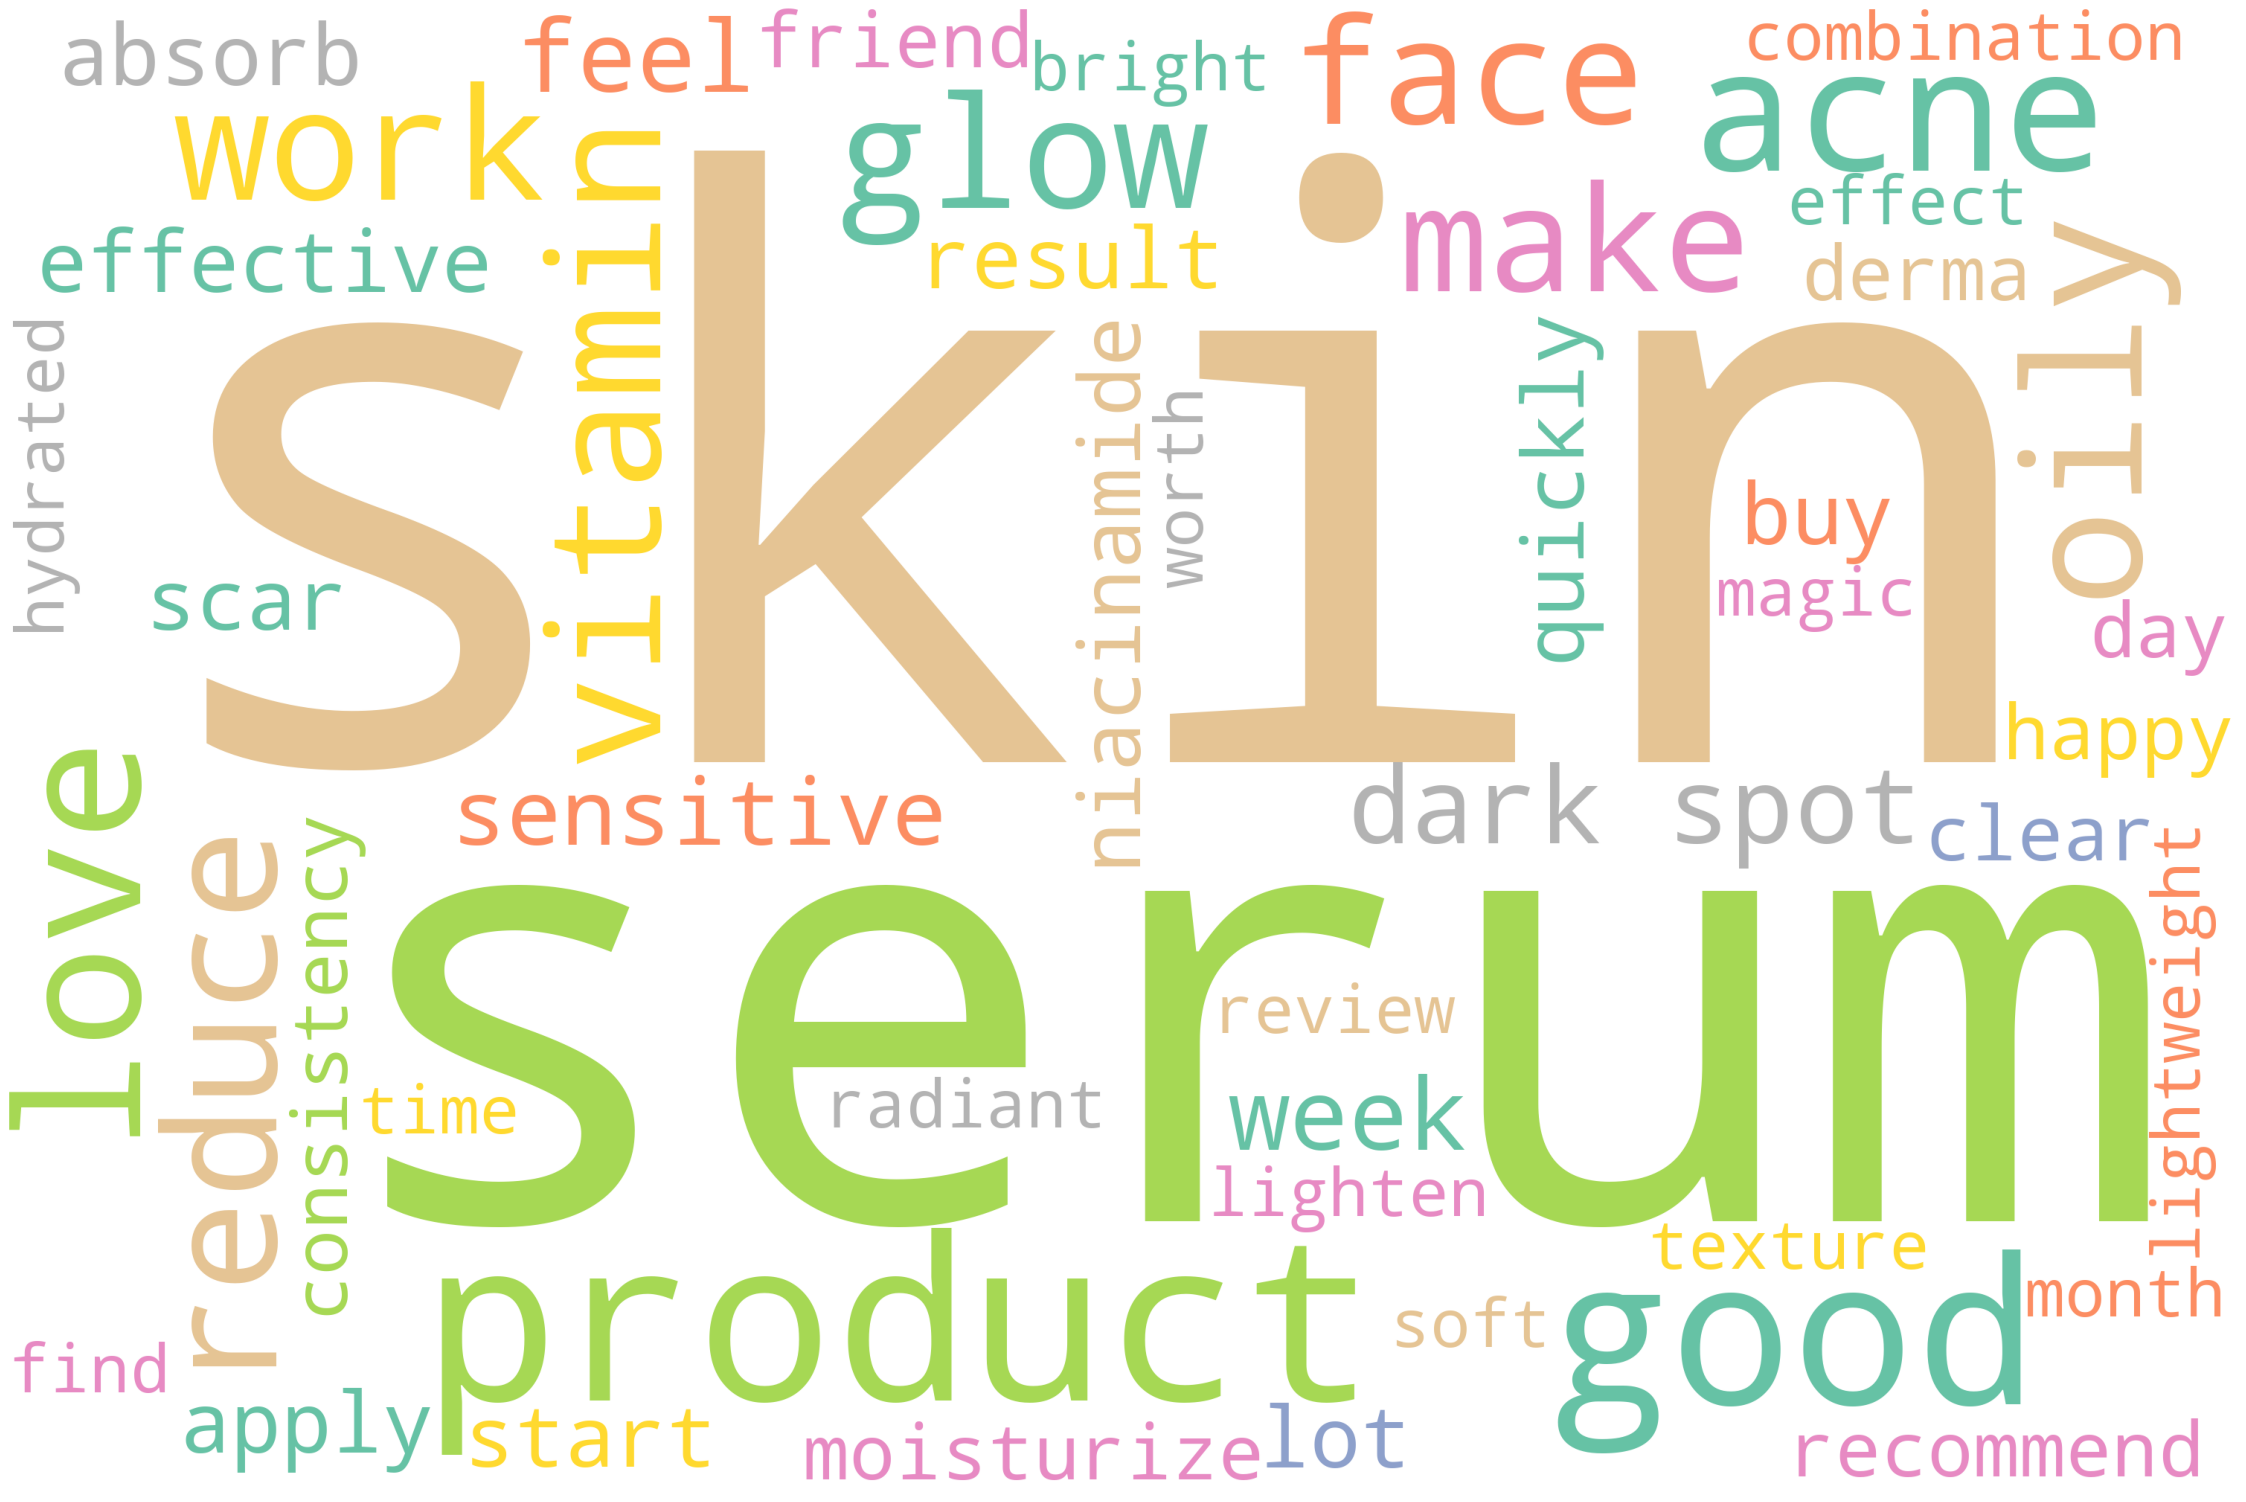

In [41]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=50,
                   colormap='Set2',stopwords=my_stop_words).generate(clean_texts)
plot_cloud(wordcloud)

***Removing Names***

In [42]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [43]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
amazon_review_df['Tidy_Text'] = np.vectorize(remove_pattern)(amazon_review_df['text'], "@[\w]*")
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
id,,,,,,,
RBTVLZJUXM9TB,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
R2X818ZWQE5CO6,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
R3LEKHFN2S7X12,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet...
R3CHIL2EGCNIE1,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
R1RNXFN2U02TQW,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance s...
REY6CU9CHNEVO,worth buying,2,12,0,0,0,worth buying


***Removing links (http | https)***

In [44]:
cleaned_text = []

for index, row in amazon_review_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tidy_Text.split() if 'http' not in word]
    cleaned_text.append(' '.join(words_without_links))

amazon_review_df['Tidy_Text'] = cleaned_text
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
id,,,,,,,
RBTVLZJUXM9TB,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
R2X818ZWQE5CO6,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
R3LEKHFN2S7X12,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
R3CHIL2EGCNIE1,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
R1RNXFN2U02TQW,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
REY6CU9CHNEVO,worth buying,2,12,0,0,0,worth buying


***Removing reviews with empty text***

In [45]:
cleaned_reviews = []

for index, row in amazon_review_df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Tidy_Text.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

amazon_review_df['Tidy_Text'] = cleaned_reviews
amazon_review_df.head(10)


,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
id,,,,,,,
RBTVLZJUXM9TB,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
R2X818ZWQE5CO6,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
R3LEKHFN2S7X12,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
R3CHIL2EGCNIE1,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
R1RNXFN2U02TQW,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
REY6CU9CHNEVO,worth buying,2,12,0,0,0,worth buying


In [46]:
amazon_review_df = amazon_review_df[amazon_review_df['Tidy_Text']!='']
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
id,,,,,,,
RBTVLZJUXM9TB,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
R2X818ZWQE5CO6,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
R3LEKHFN2S7X12,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
R3CHIL2EGCNIE1,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
R1RNXFN2U02TQW,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
REY6CU9CHNEVO,worth buying,2,12,0,0,0,worth buying


***Dropping duplicate rows***

In [47]:
amazon_review_df.drop_duplicates(subset=['Tidy_Text'], keep=False)
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
id,,,,,,,
RBTVLZJUXM9TB,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
R2X818ZWQE5CO6,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
R3LEKHFN2S7X12,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
R3CHIL2EGCNIE1,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
RWRJ52N2JQVF2,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
R1RNXFN2U02TQW,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
R1SG364J5UTPMV,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
RQCWWCEQN6H4S,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
REY6CU9CHNEVO,worth buying,2,12,0,0,0,worth buying


***Resetting index***


In [48]:
amazon_review_df = amazon_review_df.reset_index(drop=True)
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
8,worth buying,2,12,0,0,0,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...


***Removing Punctuations, Numbers and Special characters***

In [49]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [50]:
amazon_review_df['Tidy_Text'] = amazon_review_df['Tidy_Text'].apply(lambda x: clean_text(x))
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
8,worth buying,2,12,0,0,0,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...


***Function to remove emoji***

In [51]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [52]:
amazon_review_df['Tidy_Text']=amazon_review_df['Tidy_Text'].apply(lambda x: remove_emoji(x))
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
8,worth buying,2,12,0,0,0,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...


In [53]:
amazon_review_df

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...
8,worth buying,2,12,0,0,0,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...


***Removing Stop words***

In [54]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = ['i’m','\x92','rt','ye','yeah','haha','Yes','U0001F923','I','U0001F3B6','U0001F5A4']
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_reviews = []

for index, row in amazon_review_df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Tidy_Text.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_reviews.append(' '.join(words_without_stopwords))
    
amazon_review_df['absolute_tidy_text'] = cleaned_reviews
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text,absolute_tidy_text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots,helps dullness fading dark spots
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin,suitable sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...,using past five days yet see results
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...,oily skin also blemishes heard serum purchased...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...,find change bottle handy makes skin oily worth...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...,vitamin c niacinamide combined serum works lik...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...,liked serum one pump n enough whloe face n nec...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...,im looking improvement skin radiance skin tone...
8,worth buying,2,12,0,0,0,worth buying,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...,okay using serum like week definately say must...


***Tokenize 'absolute_tidy_tweets'***

In [55]:
tokenized_text = amazon_review_df['absolute_tidy_text'].apply(lambda x: x.split())
tokenized_text.head(10)

0               [helps, dullness, fading, dark, spots]
1                          [suitable, sensitive, skin]
2         [using, past, five, days, yet, see, results]
3    [oily, skin, also, blemishes, heard, serum, pu...
4    [find, change, bottle, handy, makes, skin, oil...
5    [vitamin, c, niacinamide, combined, serum, wor...
6    [liked, serum, one, pump, n, enough, whloe, fa...
7    [im, looking, improvement, skin, radiance, ski...
8                                      [worth, buying]
9    [okay, using, serum, like, week, definately, s...
Name: absolute_tidy_text, dtype: object

***Converting words to Lemma***

In [56]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [57]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [58]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')

tokenized_text = tokenized_text.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_text.head(10)

[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0                 [help, dullness, fading, dark, spot]
1                          [suitable, sensitive, skin]
2           [using, past, five, day, yet, see, result]
3    [oily, skin, also, blemish, heard, serum, purc...
4    [find, change, bottle, handy, make, skin, oily...
5    [vitamin, c, niacinamide, combined, serum, wor...
6    [liked, serum, one, pump, n, enough, whloe, fa...
7    [im, looking, improvement, skin, radiance, ski...
8                                      [worth, buying]
9    [okay, using, serum, like, week, definately, s...
Name: absolute_tidy_text, dtype: object

***Joining all tokens into sentences***

In [59]:
for i, tokens in enumerate(tokenized_text):
    tokenized_text[i] = ' '.join(tokens)

amazon_review_df['absolute_tidy_text'] = tokenized_text
amazon_review_df.head(10)


,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text,absolute_tidy_text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots,help dullness fading dark spot
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin,suitable sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...,using past five day yet see result
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...,oily skin also blemish heard serum purchased u...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...,find change bottle handy make skin oily worth ...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...,vitamin c niacinamide combined serum work like...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...,liked serum one pump n enough whloe face n nec...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...,im looking improvement skin radiance skin tone...
8,worth buying,2,12,0,0,0,worth buying,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...,okay using serum like week definately say must...


#  Feature Extaction

***Applying Bag of Words without N grams***

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [61]:
print(cv.get_feature_names()[0:100])

['absorb', 'acne', 'active', 'activity', 'add', 'adorable', 'affordable', 'allno', 'amazingon', 'amount', 'apply', 'area', 'atleast', 'aur', 'awesome', 'bahut', 'beacme', 'bed', 'bhi', 'bit', 'blemish', 'bottle', 'bright', 'buy', 'ccinamide', 'change', 'clean', 'clear', 'cmust', 'combination', 'combine', 'completely', 'compliment', 'concern', 'consistency', 'continue', 'continuous', 'control', 'couple', 'cousin', 'daily', 'damaging', 'dark', 'darken', 'day', 'daythe', 'decent', 'definately', 'derma', 'difference', 'differenceany', 'differencelove', 'do', 'dry', 'dull', 'dullness', 'dullone', 'dullskin', 'duty', 'effect', 'effective', 'evenly', 'everyday', 'excellent', 'experience', 'extent', 'face', 'fade', 'fayda', 'feel', 'feeling', 'find', 'flake', 'flawless', 'form', 'fragrance', 'free', 'fresh', 'freshi', 'friend', 'gayi', 'give', 'glow', 'glowing', 'glowy', 'good', 'great', 'guy', 'gylcerine', 'half', 'handy', 'happen', 'happy', 'harmful', 'hear', 'heavy', 'helathy', 'help', 'hel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [62]:
print(cv.get_feature_names()[100:200])

['ho', 'hone', 'honest', 'hour', 'hoursi', 'hu', 'hua', 'hydrate', 'hydrated', 'hypemust', 'hyperpigmentation', 'immediately', 'important', 'improve', 'improvement', 'increase', 'instantly', 'irritate', 'isko', 'itskin', 'ki', 'koi', 'krra', 'leave', 'lgane', 'lge', 'lifless', 'lighten', 'lightweight', 'lil', 'literally', 'long', 'looki', 'lot', 'love', 'magic', 'magical', 'magicit', 'make', 'mark', 'mere', 'moisturize', 'moisturizer', 'money', 'moneyit', 'month', 'morning', 'mujhe', 'neck', 'nhi', 'niacinamide', 'nice', 'nicely', 'night', 'not', 'oiliness', 'oily', 'order', 'package', 'part', 'pass', 'past', 'patch', 'pearlscent', 'perfect', 'personally', 'pigment', 'pigmentation', 'pimple', 'place', 'plum', 'positive', 'power', 'powerful', 'price', 'pricei', 'problem', 'product', 'promote', 'prone', 'protect', 'ps', 'pump', 'purchase', 'quickly', 'quiet', 'radiance', 'radiant', 'ready', 'reason', 'reccomend', 'recomand', 'recommend', 'reduce', 'reduction', 'refresh', 'regular', 'rehy

In [63]:
print(cv.get_feature_names()[200:300])

['result', 'resultsthe', 'review', 'routine', 'sabhi', 'safe', 'satisfied', 'scar', 'se', 'search', 'sensitive', 'serum', 'serumthis', 'shiny', 'show', 'similar', 'skin', 'skincare', 'skini', 'skinit', 'smooth', 'soft', 'solution', 'spot', 'spotless', 'spotsthis', 'start', 'stickiness', 'sticky', 'suffer', 'suganda', 'suggest', 'suggestion', 'suitable', 'sun', 'surely', 'tan', 'tanning', 'texture', 'thing', 'time', 'tone', 'trust', 'type', 'uneven', 'upto', 'usage', 've', 'vit', 'vitamin', 'vjah', 'wait', 'wastage', 'waste', 'water', 'watery', 'waythis', 'week', 'weekit', 'weight', 'welljust', 'whloe', 'winter', 'wonderful', 'work', 'worth', 'wow', 'writing']


***CountVectorizer with N-grams (Bigrams & Trigrams)***

In [64]:
!pip install tqdm



Defaulting to user installation because normal site-packages is not writeable


In [65]:
from tqdm.notebook import *

In [66]:

ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(amazon_review_df))):
    review = re.sub('[^a-zA-Z]', ' ', amazon_review_df['absolute_tidy_text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/50 [00:00<?, ?it/s]

In [67]:
corpus[10],corpus[15],corpus[20]

('skin look bright use love product serum work like magic winter dont need appli moistur appli p skin oili lighten skin lil bit give good moistur skin also lighten dark spot ive use like half week skin feel hydrat glow acn also reduc would definit recommend',
 'good effect product use product trust good also ador price love also skin sensit product friend suggest trust help skin problem one solut derma co good skin',
 'skin beacm good regular use')

In [68]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [69]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
X.shape

(50, 1725)

In [71]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [72]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,absorb,absorb quickli,absorb quickli didnt,absorb quickli skin,absorb skin,absorb skin quickli,acn,acn also,acn also reduc,acn concern,...,wow give,wow give radiant,write,write review,write review use,yet,yet safe,yet safe activ,yet see,yet see result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0


# Counting all the nouns and verbs present in the Tokens of words

In [73]:
# Filtering the nouns and verbs only
one_block=clean_texts
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['lil', 'bit', 'moisturize', 'skin', 'lighten', 'spot', 've', 'week', 'skin', 'feel', 'glow', 'acne', 'reduce', 'recommend', 'serum', 'skin', 'change', 'lot', 'love', 'skin', 'thing', 'compliment', 'skin', 'recomand', 'show', 'effect', 'form', 'month', 'effect', 'scar', 'remain', 'product', 'combination', 'niacinamide', 'vitamin', 'consistency', 'serum', 'work', 'spot', 'm', 'night', 'experience', 'give', 'improve', 'skin', 'texture', 'acne', 'concern', 'start', 'acne', 'reduce', 'add', 'amount', 'face', 'neck', 'work', 'face', 'apply', 'product', 'product', 'trust', 'price', 'love', 'skin', 'product', 'friend', 'suggest', 'trust', 'skin', 'problem', 'solution', 'derma', 'skin', 'combination', 'skin', 'product', 'work', 'skin', 'apply', 'night', 'time', 'morning', 'help', 'skin', 'reduce', 'scar', 'happen', 'cousin', 'place', 'order', 'week', 'love', 'skin', 'work', 'pigmentation', 'skin', 'day', 'bottle', 'acne', 'skin']


In [74]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:20] # viewing top tweenty results

,word,count
0,skin,64
1,product,20
2,serum,17
3,love,10
4,spot,9
5,vitamin,9
6,work,9
7,reduce,9
8,acne,9
9,glow,8


<AxesSubplot:title={'center':'Top 20 nouns and verbs'}, xlabel='word'>

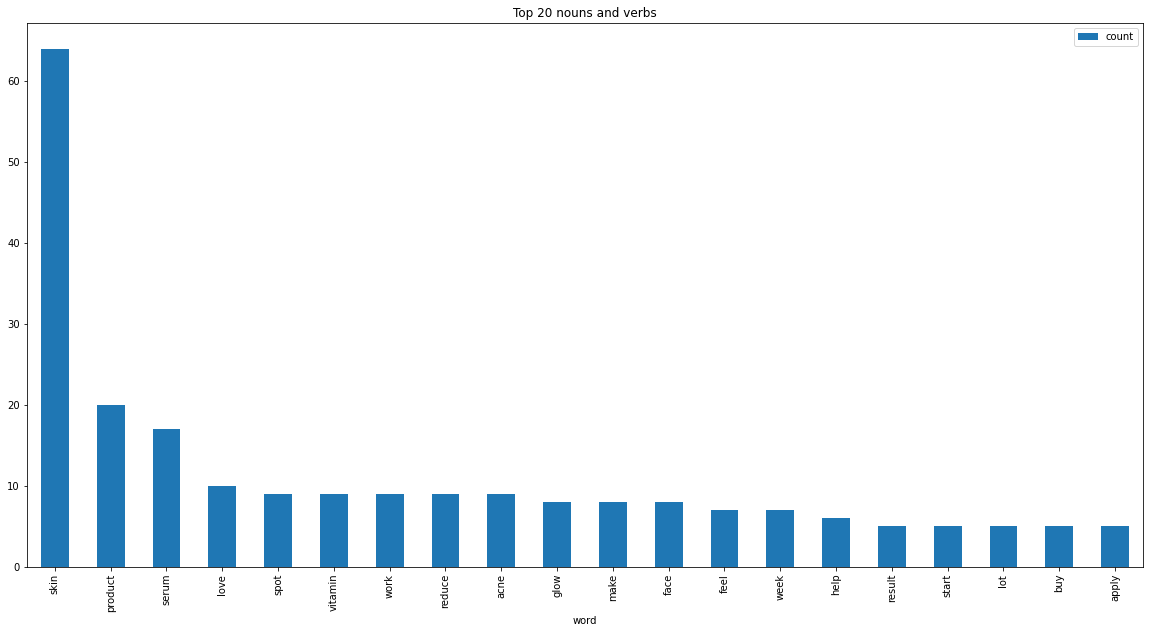

In [75]:
wd_df[0:20].plot.bar(x='word',figsize=(20,10),title='Top 20 nouns and verbs')

# Fetching Sentiments from Reviews

In [76]:
!pip3 install -U textblob

Defaulting to user installation because normal site-packages is not writeable

In [77]:
from textblob import TextBlob

In [78]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [79]:
sentiments_using_SIA = amazon_review_df.absolute_tidy_text.apply(lambda text: fetch_sentiment_using_textblob(text))
pd.DataFrame(sentiments_using_SIA.value_counts())

,absolute_tidy_text
pos,43
neg,7


In [80]:
amazon_review_df.head(10)

,text,word_count,char_count,stopwords,postive_words,negative_words,Tidy_Text,absolute_tidy_text
0,it helps with dullness and in fading dark spots,9,47,3,0,1,it helps with dullness and in fading dark spots,help dullness fading dark spot
1,suitable for sensitive skin,5,29,1,1,0,suitable for sensitive skin,suitable sensitive skin
2,have been using it for the past five days yet...,15,67,10,0,0,have been using it for the past five days yet ...,using past five day yet see result
3,i have oily skin and also blemishes i heard ab...,67,329,32,5,0,i have oily skin and also blemishes i heard ab...,oily skin also blemish heard serum purchased u...
4,did not find any change bottle is not handy ma...,23,115,10,0,1,did not find any change bottle is not handy ma...,find change bottle handy make skin oily worth ...
5,vitamin c niacinamide combined this serum work...,42,257,16,7,1,vitamin c niacinamide combined this serum work...,vitamin c niacinamide combined serum work like...
6,liked the serum one pump n its enough for the ...,27,149,15,2,1,liked the serum one pump n its enough for the ...,liked serum one pump n enough whloe face n nec...
7,im looking for improvement in skin radiance s...,81,440,47,9,1,im looking for improvement in skin radiance sk...,im looking improvement skin radiance skin tone...
8,worth buying,2,12,0,0,0,worth buying,worth buying
9,okay so after using the serum for like a week ...,74,386,46,6,2,okay so after using the serum for like a week ...,okay using serum like week definately say must...


In [81]:
!pip3 install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [82]:
nltk.download('vader_lexicon')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [84]:
amazon_review_df.absolute_tidy_text[2]

'using past five day yet see result'

In [85]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(amazon_review_df.absolute_tidy_text[2])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [86]:
amazon_review_df.absolute_tidy_text[15]

'good effective product using product trust good also adorable price loved also skin sensitive product friend suggest trust helpful skin problem one solution derma co good skin'

In [87]:
sid.polarity_scores(amazon_review_df.absolute_tidy_text[15])

{'neg': 0.052, 'neu': 0.291, 'pos': 0.656, 'compound': 0.9836}

In [88]:
amazon_review_df.absolute_tidy_text[6]

'liked serum one pump n enough whloe face n neck area gylcerine moisturizes also combination skin didnt problem'

In [89]:
sid.polarity_scores(amazon_review_df.absolute_tidy_text[6])

{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.6197}

In [90]:
score_df=pd.DataFrame()
score_df['Reviews'] = amazon_review_df.absolute_tidy_text
score_df['scores'] = amazon_review_df['Tidy_Text'].apply(lambda review: sid.polarity_scores(review))
score_df.head()

,Reviews,scores
0,help dullness fading dark spot,"{'neg': 0.2, 'neu': 0.583, 'pos': 0.217, 'comp..."
1,suitable sensitive skin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,using past five day yet see result,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,oily skin also blemish heard serum purchased u...,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp..."
4,find change bottle handy make skin oily worth ...,"{'neg': 0.068, 'neu': 0.821, 'pos': 0.111, 'co..."


In [91]:
score_df['compound']  = score_df['scores'].apply(lambda scores: scores['compound'])
score_df.head()

,Reviews,scores,compound
0,help dullness fading dark spot,"{'neg': 0.2, 'neu': 0.583, 'pos': 0.217, 'comp...",0.0516
1,suitable sensitive skin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,using past five day yet see result,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,oily skin also blemish heard serum purchased u...,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.9732
4,find change bottle handy make skin oily worth ...,"{'neg': 0.068, 'neu': 0.821, 'pos': 0.111, 'co...",0.2584


In [92]:
score_df['sentiment'] = score_df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
score_df

,Reviews,scores,compound,sentiment
0,help dullness fading dark spot,"{'neg': 0.2, 'neu': 0.583, 'pos': 0.217, 'comp...",0.0516,Positive
1,suitable sensitive skin,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,using past five day yet see result,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,oily skin also blemish heard serum purchased u...,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.9732,Positive
4,find change bottle handy make skin oily worth ...,"{'neg': 0.068, 'neu': 0.821, 'pos': 0.111, 'co...",0.2584,Positive
5,vitamin c niacinamide combined serum work like...,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.9606,Positive
6,liked serum one pump n enough whloe face n nec...,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.6197,Positive
7,im looking improvement skin radiance skin tone...,"{'neg': 0.024, 'neu': 0.734, 'pos': 0.242, 'co...",0.9651,Positive
8,worth buying,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.2263,Positive
9,okay using serum like week definately say must...,"{'neg': 0.072, 'neu': 0.708, 'pos': 0.22, 'com...",0.8718,Positive


In [93]:
score_df.groupby('sentiment').count()['Reviews'].reset_index().sort_values(by='Reviews',ascending=False)

,sentiment,Reviews
2,Positive,42
0,Negative,4
1,Neutral,4


<AxesSubplot:xlabel='sentiment', ylabel='count'>

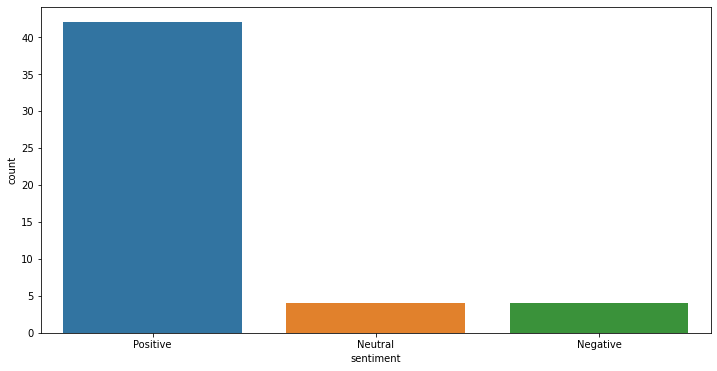

In [94]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=score_df)

In [95]:
score_df['compound'].sort_values(ascending=False)

15    0.9859
3     0.9732
13    0.9697
10    0.9676
7     0.9651
5     0.9606
17    0.9493
11    0.9485
45    0.9467
25    0.9406
21    0.9217
46    0.9186
22    0.9009
19    0.8834
9     0.8718
34    0.8588
48    0.8514
47    0.8507
30    0.8074
16    0.7845
32    0.7841
49    0.7717
18    0.7569
26    0.7003
29    0.7003
14    0.6808
23    0.6557
44    0.6369
6     0.6197
24    0.6124
20    0.5777
36    0.5719
27    0.5267
33    0.5106
42    0.5106
31    0.4404
39    0.3400
35    0.3252
4     0.2584
8     0.2263
28    0.1280
0     0.0516
40    0.0000
37    0.0000
1     0.0000
2     0.0000
41   -0.2263
12   -0.2960
43   -0.3809
38   -0.4215
Name: compound, dtype: float64

In [96]:
score_df[score_df['compound']>0.89]

,Reviews,scores,compound,sentiment
3,oily skin also blemish heard serum purchased u...,"{'neg': 0.0, 'neu': 0.658, 'pos': 0.342, 'comp...",0.9732,Positive
5,vitamin c niacinamide combined serum work like...,"{'neg': 0.0, 'neu': 0.618, 'pos': 0.382, 'comp...",0.9606,Positive
7,im looking improvement skin radiance skin tone...,"{'neg': 0.024, 'neu': 0.734, 'pos': 0.242, 'co...",0.9651,Positive
10,skin look bright using love product serum work...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9676,Positive
11,using serum skin change lot become flawless lo...,"{'neg': 0.0, 'neu': 0.721, 'pos': 0.279, 'comp...",0.9485,Positive
13,really nice product combination niacinamide vi...,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.9697,Positive
15,good effective product using product trust goo...,"{'neg': 0.035, 'neu': 0.512, 'pos': 0.454, 'co...",0.9859,Positive
17,happened use cousin place immediately ordered ...,"{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'comp...",0.9493,Positive
21,personally use serum control acne prone skin a...,"{'neg': 0.0, 'neu': 0.621, 'pos': 0.379, 'comp...",0.9217,Positive
22,writing review using serum last week excellent...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.9009,Positive


In [97]:
score_df[score_df['compound']<0]

,Reviews,scores,compound,sentiment
12,using form month effect scar remain glow,"{'neg': 0.145, 'neu': 0.855, 'pos': 0.0, 'comp...",-0.2960,Negative
38,dont buy doesnt work allno change seen reviewe...,"{'neg': 0.094, 'neu': 0.906, 'pos': 0.0, 'comp...",-0.4215,Negative
41,waste product increase acne face dont use dont,"{'neg': 0.106, 'neu': 0.894, 'pos': 0.0, 'comp...",-0.2263,Negative
43,using since last month didnt find differencean...,"{'neg': 0.12, 'neu': 0.88, 'pos': 0.0, 'compou...",-0.3809,Negative


# Product is having extremely positive reviews.